# Case Study 1 - Project 1: Heart Disease Prediction

This notebook contains a full implementation of a prediction system for various heart diseases using binary classification. The overall goal of this notebook is to go through and understand all steps of the ML workflow, which can be summarized as follows:

1. Look at the big picture and formulate the Problem to solve.
2. Get relevant data, explore and visualize to understand the data
3. Set Benchmark for evaluation - what do you want to achive?
4. Prepare data for Machine Learning, select features, ...
5. Choose appropriate model and train it
6. Look at what else you can try: Fine tune your model,... and iterate
7. Present your solution
8. Deploy, Monitor and Maintain (this part will be covered in another project)



**Initial Question**: *How would you approach the problem?*
> **Answer**: I would start by looking for existing literature as well as already implemented projects. After an initial gathering of understanding I would search for datasets to inspect and look for features to include or exclude in training/testing. After preparing the data for training, i would select a machine learning model based on existing literature projects to train and evaluate using the data selected before. Finally, I would tweak the model and or the dataset in order to improve prediction accuracy. After achieving a minimum required accuracy, i would prepare and present the results and finally deploy the model.

## Imports

In [112]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

import ucimlrepo as uci

import pickle

## 1. Project Understanding

**Initial Question**: *How does the company expect to use and benefit from this model?*
> **Answer**: Using binary classification, this model could be used to increase the efficiency of recognizing heart diseases in hospitals early and thus provide appropriate treatment for patients early. This could be done by collecting the vitality parameters of the patients that are needed as featuers for the prediction model. The benefits of this could be an overall increase of health in the population and a dicrease in fatal cases of heart diseases.

## 2. Gathering Data

For this step, we would normally compare between different public datasets (or create our own depending on use case and complexity) in order to decide which data to use. For the first project of this course, we will keep it simple and use the dataset provided in the project specification.

The dataset used for this project is the [Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)  from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/), which provides a python package called **ucimlrepo** for loading the dataset. It can be loaded as follows:

In [98]:
heart_disease = uci.fetch_ucirepo(id=45) 

# load data as dataframes
X = heart_disease.data.features 
y = heart_disease.data.targets 

After loading the data, we start by looking at the metadata to get more information about the dataset itself.

In [3]:
from pprint import pprint

pprint(heart_disease.metadata)

{'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long '
             'Beach',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'This database contains 76 attributes, but all '
                                'published experiments refer to using a subset '
                                'of 14 of them.  In particular, the Cleveland '
                                'database is the only one that has been used '
                                'by ML researchers to date.  The "goal" field '
                                'refers to the presence of heart disease in '
                                'the patient.  It is integer valued from 0 (no '
                  

The next step is to look at the different input features to get a better understanding of what the dataset contains and what can be used for training the binary classifier.

In [4]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


Finally, the output data y can be inspected for further understanding of what the output can and should look like for the binary classifier.

*Note that it would be necessary to evaluate the qualityy of the dataset. For the sake of simplicity of this first project, this step will be skipped*

### 3. Selecing Evaluation Metrics

Evaluation metrics are used to get a better understanding of how good the binary classifier is at predicting heart diseases from a given input. The choice of the metrics depends on the project and what the goals are.
In the case of this project, metrics for binary classifiers in supervised learning are used.

For this first project, a confusion matrix will be used to evaluate the classifier.
From the confusion matrix, various other metrics like accuracy, precision, recall and F1-score can be derived.

## 4. Data Preparation

In this step, we prepare the data in order to train and test the data later. This includes various steps like cleaning/transforming the data and splitting it into training and testing data.

For the heart disease dataset, we can take a look at the target variable y:

In [5]:
y["num"].unique()

array([0, 2, 1, 3, 4])

Here we can see that the target variable contains five different output values for differnet types of heart disease. In this project, a binary classification is implemented, which only differentiates between "No Heart Disease" as 0 and "Hart Disease as 1. Therefore, we need to update the columns to account for that. We do that by first mergin X and y, then we can limit the classification to a binary classification like this:

In [99]:
df=pd.concat([X, y] , axis=1)
df['target']=df["num"].apply(lambda x: 0 if x==0 else 1)
df.drop("num", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


Now we can look for missing values by looking at all the columns of the dataframe:

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


The `ca`column aswell as the `thal` column contain missing values for a few rows, This can be seen using the isna() function of pandas.

In [8]:
df[df['ca'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [9]:
df[df['thal'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,1


Those rows need to be removed before any further steps are taken. This can be done easily using the dropna() function of pandas:

In [100]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


Now that the data is cleaned, we can split the into X and y again and then further split them into train and test data

In [101]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

**Question**: *Wait! Before you look at the data any further, you need to create a test set, put it aside, and never look at it.*
*Why should you do this at this stage?*
> **Answer**: The purpose of the testing data is to validate a models performance after training. When testing data is already known during training, the resulting models performance on the testing is skewed because the model has already seen the data and is therefore biased.

## 5. Model Selection, Training and Evaluation

In this step, a model is selected depending on the use case and type of project. In this case, a model for binary classification needs to be selected. For the sake of simplicity, we first start with a Random forest classifier as the first baseline. This can be done easily using sklearn, which already implements a Random forest classifier. First, we need to create the classifier as follows:

In [12]:
classifier_rf = RandomForestClassifier() # Create classifier, optionally adjust hyperparameters
classifier_rf.get_params() # inspect params after instantiation

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Now we can train the classifier on the training data that was prepared beforehand:

In [13]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier()

Finally, we can predict the test data using our trained Random forest classifier. This can be done like this:

In [14]:
y_pred=classifier_rf.predict( X_test) # predict target for input testing data
print(y_pred)
y_test=np.array(y_test) # print prediction and test data in order to compare classification
print(y_test)

print(classifier_rf.score(X_test, y_test)) # print prediction score of test data
print(classifier_rf.score(X_train, y_train)) # print prediciton score of training data

[1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0]
[1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0]
0.8
1.0


**Question**: *What does a score of 1 represent? Explain the phenomena*
> **Answer**: The prediction score of 1 represents a 100% accuracy for predicting heart diseases for a given input. This happens for the prediction of the training data, because it already knows the data from training and has a bias towards it. This can be an indicator for overfitting, although the relatively high accuracy for the training data does not implicate overfitting in this case.

Now we can use a confusion matrix for evaluating the Random forest classifiers performance. This can easily be done with the built in functions by sklearn:

In [15]:
print( confusion_matrix(y_test, y_pred),"\n", classification_report(y_test, y_pred), "\n",accuracy_score(y_test, y_pred))

[[25  6]
 [ 6 23]] 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        31
           1       0.79      0.79      0.79        29

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60
 
 0.8


For better readability, the data is then visualized:

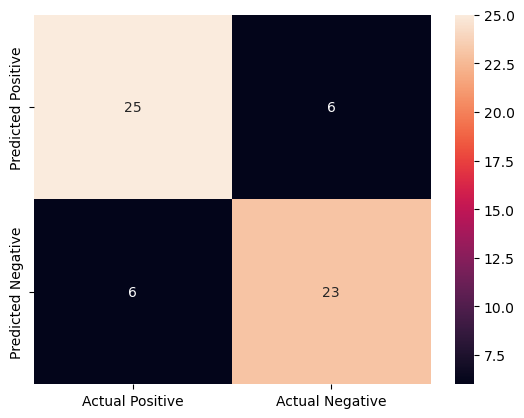

In [16]:
X_labels = ["Actual Positive", "Actual Negative"]  # Replace 0,1 with A, B, C, D
y_labels = ["Predicted Positive", "Predicted Negative"]

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=X_labels, yticklabels=y_labels, annot=True, ax=ax)
plt.show()

**Question**: *Explain what you see on a confusion matrix, and what are precision, recall and F1 score.*
> **Answer**: A confusion matrix is split into four categories, two of which are on the x and two are on the y axis: X = [Actual Positive, Actual Negative] and y = [Predicted Positive, Predicted Negative]. This can be used to compare the predicted results to the actual results.
In addition, the confusion matrix can be used to calculate precision, recall, and the F1 score.
The precision is the amount of predicted positives that are actually positive.
The recall describes the amount of actual positives that were identified. The key difference to the precision is that the precision only takes the predicted positives into account, while the recall takes all predictions into account.
The F1-Score is calculated from recall and position and can be used as the mean between those two metrics. It can be seen as the combination of both false positives and false negatives. 

Now after evaluating the model, we can see that it is not very accurate at identifying actual positives. Therefore, hyperparameters need to be adjusted in order to increase the prediction performance. For the random forest, we can adjust the amount of estimators used. This can be done using a for loop, to test different amounts of estimators:

In [78]:
res={}
for i in range(10,500, 50): 
    classif_i=RandomForestClassifier(n_estimators=i)
    classif_i.fit(X_train, y_train)
    res[i]=  classif_i.score(X_test, y_test)
print(res)
print("Max score :", max(res.values()), "For i=", max(res, key=res.get), "\n")

{10: 0.8, 60: 0.8166666666666667, 110: 0.8166666666666667, 160: 0.8, 210: 0.8, 260: 0.8166666666666667, 310: 0.8333333333333334, 360: 0.8333333333333334, 410: 0.8166666666666667, 460: 0.8166666666666667}
Max score : 0.8333333333333334 For i= 310 



**Question**: *Re-run the above cell, do you get the same result? Why?*
> **Answer**: No, different results are achieved everytime, though to randomness introduced in the random forest classifier. In a process called "bootstrap sampling", multiple variants of descision trees are created during training with different subsets of data to be used for training, which are selected randomly. The randomness for results can be prevented by setting a seed for the random generation.

For reprodubability, we set a random_state to prevent varying results for each execution of the loop.

In [85]:
res={}
for i in range(10,500, 50): 
    classif_i=RandomForestClassifier(n_estimators=i, random_state=12)
    classif_i.fit(X_train, y_train)
    res[i]=  classif_i.score(X_test, y_test)
print(res)
print("Max score :", max(res.values()), "For i=", max(res, key=res.get), "\n")

{10: 0.7833333333333333, 60: 0.8166666666666667, 110: 0.8, 160: 0.8166666666666667, 210: 0.8, 260: 0.8333333333333334, 310: 0.8333333333333334, 360: 0.8333333333333334, 410: 0.8333333333333334, 460: 0.8166666666666667}
Max score : 0.8333333333333334 For i= 260 



## 6. Experimentation

Before doing any experiments with the random forest model, it is a good practice to store the model in a pickle file so it can be reused later. This can be done like this:

In [18]:
# Make sure the Models folder exists before executing this line
pickle.dump(classifier_rf, open("./Models/random_forest_1.pkl", "wb")) # wb=write binary

After storing the model, it can be restored as follows:

In [6]:
loaded_classifier = pickle.load(open("./Models/random_forest_1.pkl", "rb")) # rb read binary
loaded_classifier.score(X_test, y_test)

0.8

### 6.1 Univariate Analyis

**Question**: *Look at a histogram of age. What does this plot tell us?*

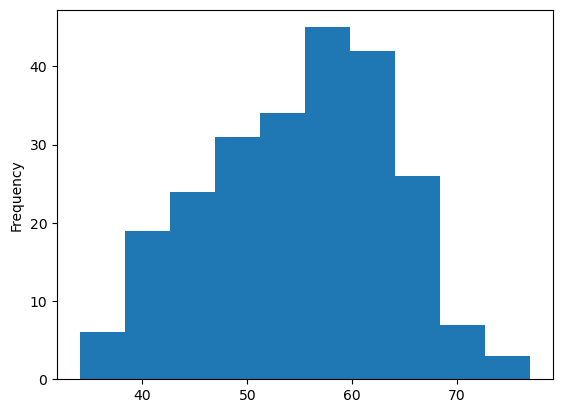

In [7]:
# Check the distribution of the age column with a histogram
X_train.age.plot.hist();#bins=50) ;

> **Answer**: It can be seen that a significant part of the heart disease data was collected from people aged 40-60, with the most people having an age of around 60 years. This can be interpreted as the most likely age to experience heart diseases.

### 6.2 Multivariate Analyis

**Question**: *Is Heart Disease Frequency the same for both sexes? Produce a visualization that answers this question.*

In [8]:
X_male = X_train[X_train["sex"] == 1]
X_female = X_train[X_train["sex"] == 0]

In [22]:
print("Amount Male:   ", len(X_male))
print("Amount Female: ", len(X_female))

Amount Male:    162
Amount Female:  75


Due to the fact that there are twice as many male heart disease patients in the dataset, the frequency for male will be higher by default. therefore, we enable the density parameter for the histogram to ensure even frequency values for both male and female participants.

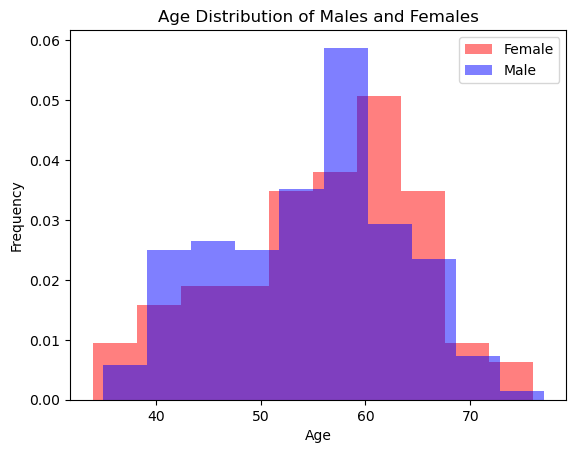

In [ ]:
plt.hist(X_female.age, alpha=0.5, label="Female", color="red", density=True) # density True to ensure frequency is  between 0 and 1
plt.hist(X_male.age, alpha=0.5, label="Male", color="blue", density=True) # density True to ensure frequency is  between 0 and 1

plt.title("Age Distribution of Males and Females")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()

plt.show()


> **Answer**: It can be seen that the distribution for male and female heart disease cases are similar, except that the frequency is higher for male patients between 40 and 50. In the age range of aroung 60 years, it can be seen that male patients have a higher frequency than female patients. After that, the male frequency experiences a fast drop, whereas the female frequency drops later at around 65 years until at 70 years, the frequency is practically the same for both sexes. That means that between the age of 60 and 65, female patients have a higher frequency of heart diseases than male patients.

**Question**: *Look at Age vs. Max Heart Rate for Heart Disease. What can you deduce?*

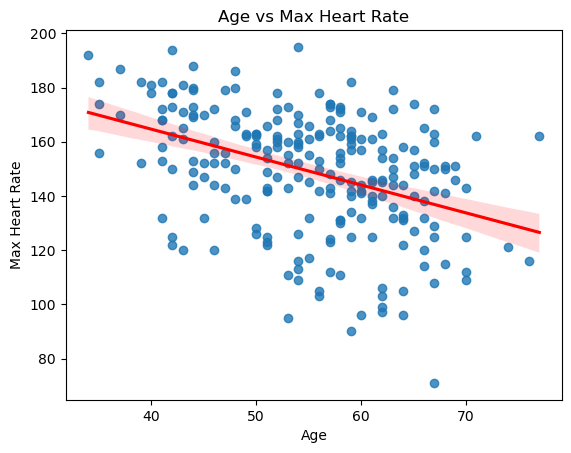

In [66]:
# the max heart rate is stored in column 'thalach'
# a suitable plot to compare age and thalach is the scatter plot, as it shows correlations between those two values

X_train_df = pd.DataFrame(X_train)

sns.regplot(x=X_train_df["age"], y=X_train_df["thalach"], line_kws={"color":"red"}) # line_kws sets appearance of regression line

plt.title("Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.show()

> **Answer**: A decline in max heart rate can be seen using the regression line. At age 30, a maximum heart rate of around 180 pm is average, while at 70 bpm, the average max heart rate is down to 140, which is a decline of around 40 bpm.

**Question**: *Perform some more EDA, draw and explain some conclusions:*

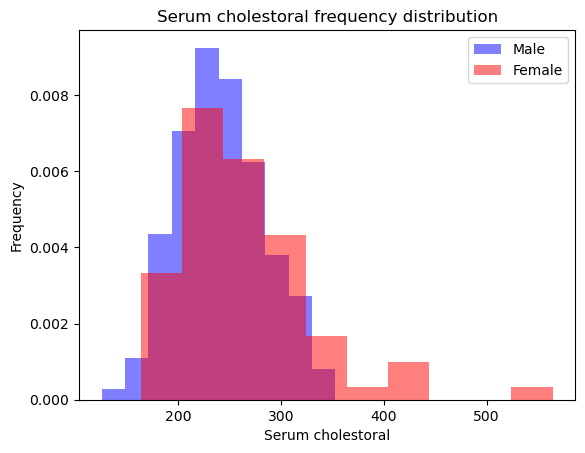

In [ ]:
# look at serum cholestoral value for age
plt.hist(X_male.chol, alpha=0.5, label="Male", color="blue", density=True) # density True to ensure frequency is  between 0 and 1
plt.hist(X_female.chol, alpha=0.5, label="Female", color="red", density=True) # density True to ensure frequency is  between 0 and 1


plt.title("Serum cholestoral frequency distribution")
plt.xlabel("Serum cholestoral")
plt.ylabel("Frequency")
plt.legend()

plt.show()


Here it can be seen that most cholestoral values are in a range between 150 and 350. There are a very few outliers that deviate from this pattern. Additionally,  it can be seen that in the average range of 150 to 350, male patients have a higher cholestoral value than the female patients. apart from that, we can see that the outlier values are exclusively female patients.

C:\Users\nikla\AppData\Local\Temp\ipykernel_16184\1099179459.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_train_df["cp_label"], palette="coolwarm") # use cp_label to display the names


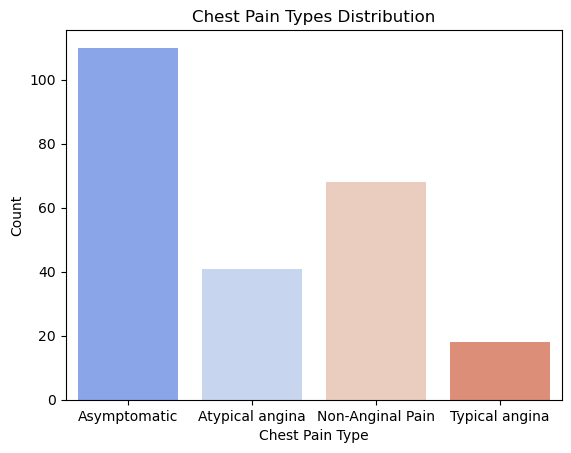

In [68]:
# Exploring patterns in chest pain types
types = {1: "Typical angina", 2: "Atypical angina", 3: "Non-Anginal Pain", 4: "Asymptomatic"} 


X_train_df = pd.DataFrame(X_train)

X_train_df["cp_label"] = X_train_df["cp"].map(types) # create labels for better visualization

# Plot
sns.countplot(x=X_train_df["cp_label"], palette="coolwarm") # use cp_label to display the names

plt.title("Chest Pain Types Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")

plt.show()

The distribution plot shows that most common type of chest pain from the patients is asymptomatic chest pain, while the least common is typical angina.

Now let's analyze if there are differnces in sexes for the chest pain distributions

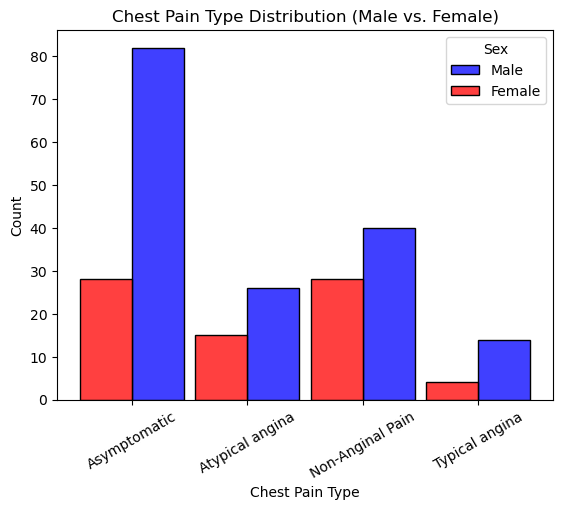

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define chest pain type labels
types = {1: "Typical angina", 2: "Atypical angina", 3: "Non-Anginal Pain", 4: "Asymptomatic"}

# Convert cp values to labels
X_train_df = pd.DataFrame(X_train)
X_train_df["cp_label"] = X_train_df["cp"].map(types)

# Plot overlapping histograms for male (sex=1) and female (sex=0)
sns.histplot(data=X_train_df, x="cp_label", hue="sex", multiple="dodge", palette=["red", "blue"], shrink=0.9)

# Titles and labels
plt.title("Chest Pain Type Distribution (Male vs. Female)")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")

# Custom legend
plt.legend(title="Sex", labels=["Male", "Female"])  

# Rotate x-axis labels for readability
plt.xticks(rotation=30)

# Show plot
plt.show()


When looking at the chest pain type distribution for male and female patients, it can be seen that while there is a significant amount of asymptomatic chest pain for male patients, female patients have a much lower amount of asymptomatic chest pain cases. While there are in total only half as many female patients, the asymptomatic chest pain does not seem like an outlier for female patients.

### 6.3 Study Correlation

In [87]:
X_train.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.074463,0.089962,0.274300,0.201002,0.114377,0.176841,-0.407286,0.143116,0.253088,0.156800,0.356234,0.131856
sex,-0.074463,1.000000,0.051439,-0.079061,-0.201388,0.045537,0.031145,-0.081807,0.189877,0.108976,0.054149,0.113464,0.409646
cp,0.089962,0.051439,1.000000,-0.043520,0.053534,-0.059361,0.091374,-0.315394,0.354932,0.177916,0.155689,0.217899,0.297631
trestbps,0.274300,-0.079061,-0.043520,1.000000,0.103247,0.177609,0.179078,-0.012099,0.053680,0.195831,0.100469,0.102180,0.101753
chol,0.201002,-0.201388,0.053534,0.103247,1.000000,-0.012730,0.220124,-0.031059,0.046444,0.034468,0.031224,0.109580,0.008250
fbs,0.114377,0.045537,-0.059361,0.177609,-0.012730,1.000000,0.057035,-0.007386,-0.019656,0.016253,0.082250,0.145151,0.085950
restecg,0.176841,0.031145,0.091374,0.179078,0.220124,0.057035,1.000000,-0.108429,0.141997,0.165986,0.157889,0.122330,0.050099
thalach,-0.407286,-0.081807,-0.315394,-0.012099,-0.031059,-0.007386,-0.108429,1.000000,-0.405939,-0.354633,-0.377472,-0.270547,-0.251602
exang,0.143116,0.189877,0.354932,0.053680,0.046444,-0.019656,0.141997,-0.405939,1.000000,0.285484,0.270373,0.201218,0.346106
oldpeak,0.253088,0.108976,0.177916,0.195831,0.034468,0.016253,0.165986,-0.354633,0.285484,1.000000,0.566936,0.329554,0.332677


We can visualize the correlation matrix as a heatmap to make it easier to interpret the correlation grade between two features:

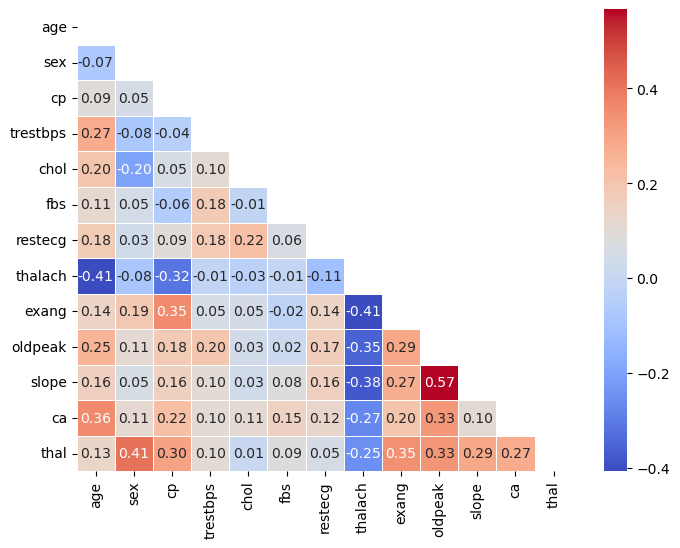

In [92]:
import seaborn as sns
corr_matrix = X_train.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask duplicate values to remove redundant correlations

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, mask=mask, linewidths=0.5, cmap="coolwarm", fmt=".2f")
plt.show()

**Question**: *Study the correlation between the features in your data set*
> **Answer**: When taking a look at the heatmap, it can be seen that there are a few strong and negative correlations in the data. As discussed before, a strong negative correlation between maximum heart rate and age can seen, which shows how the maximum heart rate will decrease when getting older. Additionally, there seems to be a a slight negative correlation between chest pain type and maximum heart rate, although this is a correlation between a numerical value and a categorial value, therefore the correlation can not be interpreted clearly. The same can be said for the correlation of cp-exang, oldpeak-slope, and various other correlations with categorical features. Apart from that, there is a  positive correlation between the oldpeak value, which indicates the ST depression during an during exercise, and the ca value, which indicates the amount of major blood vessels that are visible in a fluoroscopy scan. This can be interpreted as having more major blood vessels causes more St depression during exercise or vice versa. Apart from that, no major correlations can be seen in the data, only slight correlations. 

### 7. Different Models

In this chapter we will implemented other classifiers than Random Forest and compare the results.
The classifiers being implemented now are:
- Logistic Regression
- K-Nearest-Neighbour Classifier

The resulting models will then be compared to the random forest classifier.

#### 7.1 Logistic Regression

Before training the model, the data should be scaled due to the logistic regression model being sensitive to feature scales.

In [102]:
# Scale data for logistic regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

After that is done, the logistic regression model can be built and trained like this:

In [ ]:
# Initialize model
log_reg = LogisticRegression()

# Train model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

Now we can store the model again to use it later:

In [ ]:
# Make sure the Models folder exists before executing this line
pickle.dump(log_reg, open("./Models/logistic_regression_1.pkl", "wb")) # wb=write binary

In [110]:
log_reg_classifier = pickle.load(open("./Models/logistic_regression_1.pkl", "rb")) # rb read binary
log_reg_classifier.score(X_test_scaled, y_test)

0.8333333333333334

#### 7.2 K-Nearest-Neighbour Classifier

In [113]:
# Note: We have already performed standard scaling on the data, therefore we will reuse this for the KNN and skip the step

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [115]:
# Make sure the Models folder exists before executing this line
pickle.dump(knn, open("./Models/knn_classifier_1.pkl", "wb")) # wb=write binary

In [116]:
knn_classifier = pickle.load(open("./Models/knn_classifier_1.pkl", "rb")) # rb read binary
knn_classifier.score(X_test_scaled, y_test)

0.8333333333333334